In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import time
import glob, os
from skimage.transform import resize

# ISLES 2017 (MRI)

# Train

In [ ]:
path = "/home/usuario/Downloads/ISLES2017/training/"
pathpngmask = "/home/usuario/Downloads/ISLES2017/pngmask/"
pathpng = "/home/usuario/Downloads/ISLES2017/png/"
pathsplitted = "/home/usuario/Downloads/ISLES2017/prueba/"

pathcbf = "/home/usuario/Downloads/ISLES2017/pngcbf/"
pathcbv = "/home/usuario/Downloads/ISLES2017/pngcbv/"
pathmtt = "/home/usuario/Downloads/ISLES2017/pngmtt/"
pathtmax = "/home/usuario/Downloads/ISLES2017/pngtmax/"
pathttp = "/home/usuario/Downloads/ISLES2017/pngttp/"
pathadc = "/home/usuario/Downloads/ISLES2017/pngadc/"

In [ ]:
list_splitted = []

for file in os.listdir(pathsplitted):
    list_splitted.append(file)

print(len(list_splitted))
#print(list_splitted)
print(list_splitted[0])

In [ ]:
list_mri = []
list_cbf = []
list_cbv = []
list_mtt = []
list_tmax = []
list_ttp = []
list_adc = []
list_mask = []

In [ ]:
#mydebug = 0

for myfolder in os.listdir(path):
    print("Carpeta: ", myfolder)
    for mysubfolder in os.listdir(path+myfolder):
        if mysubfolder.find(".O.OT.") != -1:
            #print(mysubfolder)
            path2 = path+myfolder+"/"+mysubfolder+"/"
            os.chdir(path2)
            for file in glob.glob("*.gz"):
                print(file)
                #break
                img = nib.load(path2+file)
                data = img.get_fdata()
                f = file.split(".nii.gz")[0].split(".")[-1]
                if data.shape[0]<256:
                    #for i in range(64,194):
                    for i in range(data.shape[2]):
                        #64 - 194
                        resized = resize(data[:,:,i],(256,256))
                        nueva = np.ones((256,256))
                        nueva[resized==0] = 0
                        plt.imsave(pathpngmask+f+"-frame"+str(i)+".png", nueva, cmap="gray")
                        list_mask.append(f+"-frame"+str(i)+".png")
                        #break
                else:
                    #for i in range(64,194):
                    for i in range(data.shape[2]):
                        #64 - 194
                        plt.imsave(pathpngmask+f+"-frame"+str(i)+".png", data[:,:,i], cmap="gray")
                        list_mask.append(f+"-frame"+str(i)+".png")

In [ ]:
#mydebug = 0

for myfolder in os.listdir(path):
    print("Carpeta: ", myfolder)
    #os.chdir(path+myfolder+"/VSD.Brain.XX.O.OT")
    #print(os.listdir(path+myfolder))
    for mysubfolder in os.listdir(path+myfolder):
        if mysubfolder.find("MR_4DPWI") != -1:
            #print(mysubfolder)
            path2 = path+myfolder+"/"+mysubfolder+"/"
            os.chdir(path2)
            for file in glob.glob("*.gz"):
                print(file)
                #break
                img = nib.load(path2+file)
                data = img.get_fdata()
                #print(file, data.shape, type(data))
                f = file.split(".nii.gz")[0].split(".")[-1]          
                tamano = len(data.shape)
                #print("tamaño", tamano)
                if data.shape[0]<256:
                    #for i in range(64,194):
                    for i in range(data.shape[2]):
                        #64 - 194
                        if len(data.shape) == 4:
                            resized = resize(data[:,:,i,0],(256,256))
                        else:
                            resized = resize(data[:,:,i,0,0],(256,256))
                        plt.imsave(pathpng+f+"-frame"+str(i)+".png", resized, cmap="gray")
                        list_mri.append(f+"-frame"+str(i)+".png")
                        #break
                else:
                    #for i in range(64,194):
                    for i in range(data.shape[2]):
                        #64 - 194
                        plt.imsave(pathpng+f+"-frame"+str(i)+".png", data[:,:,i,0,0], cmap="gray")
                        list_mri.append(f+"-frame"+str(i)+".png")

In [ ]:
#mydebug = 0

for myfolder in os.listdir(path):
    print("Carpeta: ", myfolder)
    #os.chdir(path+myfolder+"/VSD.Brain.XX.O.OT")
    #print(os.listdir(path+myfolder))
    for mysubfolder in os.listdir(path+myfolder):
        if mysubfolder.find("MR_ADC") != -1:
            #print(mysubfolder)
            path2 = path+myfolder+"/"+mysubfolder+"/"
            os.chdir(path2)
            for file in glob.glob("*.gz"):
                print(file)
                #break
                img = nib.load(path2+file)
                data = img.get_fdata()
                #print(file, data.shape, type(data))
                f = file.split(".nii.gz")[0].split(".")[-1]          
                tamano = len(data.shape)
                #print("tamaño", tamano)
                if data.shape[0]<256:
                    #for i in range(64,194):
                    for i in range(data.shape[2]):
                        #64 - 194
                        resized = resize(data[:,:,i],(256,256))
                        plt.imsave(pathadc+f+"-frame"+str(i)+".png", resized, cmap="gray")
                        list_adc.append(f+"-frame"+str(i)+".png")
                        #break
                else:
                    #for i in range(64,194):
                    for i in range(data.shape[2]):
                        #64 - 194
                        plt.imsave(pathadc+f+"-frame"+str(i)+".png", data[:,:,i], cmap="gray")
                        list_adc.append(f+"-frame"+str(i)+".png")

In [ ]:
#mydebug = 0

for myfolder in os.listdir(path):
    print("Carpeta: ", myfolder)
    #os.chdir(path+myfolder+"/VSD.Brain.XX.O.OT")
    #print(os.listdir(path+myfolder))
    for mysubfolder in os.listdir(path+myfolder):
        if mysubfolder.find("MR_TTP") != -1:
            #print(mysubfolder)
            path2 = path+myfolder+"/"+mysubfolder+"/"
            os.chdir(path2)
            for file in glob.glob("*.gz"):
                print(file)
                #break
                img = nib.load(path2+file)
                data = img.get_fdata()
                #print(file, data.shape, type(data))
                f = file.split(".nii.gz")[0].split(".")[-1]          
                tamano = len(data.shape)
                #print("tamaño", tamano)
                if data.shape[0]<256:
                    #for i in range(64,194):
                    for i in range(data.shape[2]):
                        #64 - 194
                        resized = resize(data[:,:,i],(256,256))
                        plt.imsave(pathttp+f+"-frame"+str(i)+".png", resized, cmap="gray")
                        list_ttp.append(f+"-frame"+str(i)+".png")
                        #break
                else:
                    #for i in range(64,194):
                    for i in range(data.shape[2]):
                        #64 - 194
                        plt.imsave(pathttp+f+"-frame"+str(i)+".png", data[:,:,i], cmap="gray")
                        list_ttp.append(f+"-frame"+str(i)+".png")

In [ ]:
#mydebug = 0

for myfolder in os.listdir(path):
    print("Carpeta: ", myfolder)
    #os.chdir(path+myfolder+"/VSD.Brain.XX.O.OT")
    #print(os.listdir(path+myfolder))
    for mysubfolder in os.listdir(path+myfolder):
        if mysubfolder.find("MR_Tmax") != -1:
            #print(mysubfolder)
            path2 = path+myfolder+"/"+mysubfolder+"/"
            os.chdir(path2)
            for file in glob.glob("*.gz"):
                print(file)
                #break
                img = nib.load(path2+file)
                data = img.get_fdata()
                #print(file, data.shape, type(data))
                f = file.split(".nii.gz")[0].split(".")[-1]          
                tamano = len(data.shape)
                #print("tamaño", tamano)
                if data.shape[0]<256:
                    #for i in range(64,194):
                    for i in range(data.shape[2]):
                        #64 - 194
                        resized = resize(data[:,:,i],(256,256))
                        plt.imsave(pathtmax+f+"-frame"+str(i)+".png", resized, cmap="gray")
                        list_tmax.append(f+"-frame"+str(i)+".png")
                        #break
                else:
                    #for i in range(64,194):
                    for i in range(data.shape[2]):
                        #64 - 194
                        plt.imsave(pathtmax+f+"-frame"+str(i)+".png", data[:,:,i], cmap="gray")
                        list_tmax.append(f+"-frame"+str(i)+".png")

In [ ]:
#mydebug = 0

for myfolder in os.listdir(path):
    print("Carpeta: ", myfolder)
    #os.chdir(path+myfolder+"/VSD.Brain.XX.O.OT")
    #print(os.listdir(path+myfolder))
    for mysubfolder in os.listdir(path+myfolder):
        if mysubfolder.find("MR_MTT") != -1:
            #print(mysubfolder)
            path2 = path+myfolder+"/"+mysubfolder+"/"
            os.chdir(path2)
            for file in glob.glob("*.gz"):
                print(file)
                #break
                img = nib.load(path2+file)
                data = img.get_fdata()
                #print(file, data.shape, type(data))
                f = file.split(".nii.gz")[0].split(".")[-1]          
                tamano = len(data.shape)
                #print("tamaño", tamano)
                if data.shape[0]<256:
                    #for i in range(64,194):
                    for i in range(data.shape[2]):
                        #64 - 194
                        resized = resize(data[:,:,i],(256,256))
                        plt.imsave(pathmtt+f+"-frame"+str(i)+".png", resized, cmap="gray")
                        list_mtt.append(f+"-frame"+str(i)+".png")
                        #break
                else:
                    #for i in range(64,194):
                    for i in range(data.shape[2]):
                        #64 - 194
                        plt.imsave(pathmtt+f+"-frame"+str(i)+".png", data[:,:,i], cmap="gray")
                        list_mtt.append(f+"-frame"+str(i)+".png")

In [ ]:
#mydebug = 0

for myfolder in os.listdir(path):
    print("Carpeta: ", myfolder)
    #os.chdir(path+myfolder+"/VSD.Brain.XX.O.OT")
    #print(os.listdir(path+myfolder))
    for mysubfolder in os.listdir(path+myfolder):
        if mysubfolder.find("MR_rCBV") != -1:
            #print(mysubfolder)
            path2 = path+myfolder+"/"+mysubfolder+"/"
            os.chdir(path2)
            for file in glob.glob("*.gz"):
                print(file)
                #break
                img = nib.load(path2+file)
                data = img.get_fdata()
                #print(file, data.shape, type(data))
                f = file.split(".nii.gz")[0].split(".")[-1]          
                tamano = len(data.shape)
                #print("tamaño", tamano)
                if data.shape[0]<256:
                    #for i in range(64,194):
                    for i in range(data.shape[2]):
                        #64 - 194
                        resized = resize(data[:,:,i],(256,256))
                        plt.imsave(pathcbv+f+"-frame"+str(i)+".png", resized, cmap="gray")
                        list_cbv.append(f+"-frame"+str(i)+".png")
                        #break
                else:
                    #for i in range(64,194):
                    for i in range(data.shape[2]):
                        #64 - 194
                        plt.imsave(pathcbv+f+"-frame"+str(i)+".png", data[:,:,i], cmap="gray")
                        list_cbv.append(f+"-frame"+str(i)+".png")

In [ ]:
#mydebug = 0

for myfolder in os.listdir(path):
    print("Carpeta: ", myfolder)
    #os.chdir(path+myfolder+"/VSD.Brain.XX.O.OT")
    #print(os.listdir(path+myfolder))
    for mysubfolder in os.listdir(path+myfolder):
        if mysubfolder.find("MR_rCBF") != -1:
            #print(mysubfolder)
            path2 = path+myfolder+"/"+mysubfolder+"/"
            os.chdir(path2)
            for file in glob.glob("*.gz"):
                print(file)
                #break
                img = nib.load(path2+file)
                data = img.get_fdata()
                #print(file, data.shape, type(data))
                f = file.split(".nii.gz")[0].split(".")[-1]          
                tamano = len(data.shape)
                #print("tamaño", tamano)
                if data.shape[0]<256:
                    #for i in range(64,194):
                    for i in range(data.shape[2]):
                        #64 - 194
                        resized = resize(data[:,:,i],(256,256))
                        plt.imsave(pathcbf+f+"-frame"+str(i)+".png", resized, cmap="gray")
                        list_cbf.append(f+"-frame"+str(i)+".png")
                        #break
                else:
                    #for i in range(64,194):
                    for i in range(data.shape[2]):
                        #64 - 194
                        plt.imsave(pathcbf+f+"-frame"+str(i)+".png", data[:,:,i], cmap="gray")
                        list_cbf.append(f+"-frame"+str(i)+".png")

In [ ]:
list_mri
print(len(list_mri))

list_mask
print(len(list_mask))

list_cbf
print(len(list_cbf))

list_cbv
print(len(list_cbv))

list_mtt
print(len(list_mtt))

list_tmax
print(len(list_tmax))

list_ttp
print(len(list_ttp))

list_adc
print(len(list_adc))

In [ ]:
import pandas as pd
lista = ["MRI","MASK","CBF","CBV","MTT","TMAX","TTP","ADC"]
datos = []
for i in range(len(list_mri)):
    datos.append([list_mri[i], list_mask[i], list_cbf[i], list_cbv[i], list_mtt[i], list_tmax[i], list_ttp[i], list_adc[i]])
cities = pd.DataFrame(columns=list(lista), data=datos)
#print(cities.head)
cities.to_csv('/home/usuario/Downloads/ISLES2017/lista2017.csv')

cities2 = cities.copy()

#print(cities2["MRI"].loc[33])
print(cities2.shape)

for i in range(cities2.shape[0]):
    if cities2["MRI"].loc[i] not in list_splitted:
        print(cities2["MRI"].loc[i], "no fue encontrado")
        cities2 = cities2.drop(i, axis=0)
    #if indice is None:
    #    print(cities2["MRI"].loc[i], "no fue encontrado")
    #break
print(cities2.shape)
cities2.to_csv('/home/usuario/Downloads/ISLES2017/lista2017-splitted.csv')

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
#pathf = "/home/usuario/Downloads/ISLES2017/training/training_15/VSD.Brain.XX.O.MR_4DPWI.127063/VSD.Brain.XX.O.MR_4DPWI.127063.nii.gz"
pathf = "/home/usuario/Downloads/ISLES2017/training/training_1/VSD.Brain.XX.O.MR_ADC.128020/VSD.Brain.XX.O.MR_ADC.128020.nii.gz"
#pathf = "/home/usuario/Downloads/ISLES2017/training/training_15/VSD.Brain.XX.O.MR_MTT.127062/VSD.Brain.XX.O.MR_MTT.127062.nii.gz"
#pathf = "/home/usuario/Downloads/ISLES2017/training/training_15/VSD.Brain.XX.O.MR_rCBF.127064/VSD.Brain.XX.O.MR_rCBF.127064.nii.gz"
#pathf = "/home/usuario/Downloads/ISLES2017/training/training_15/VSD.Brain.XX.O.MR_rCBV.127065/VSD.Brain.XX.O.MR_rCBV.127065.nii.gz"
#pathf = "/home/usuario/Downloads/ISLES2017/training/training_15/VSD.Brain.XX.O.MR_Tmax.127066/VSD.Brain.XX.O.MR_Tmax.127066.nii.gz"
#pathf = "/home/usuario/Downloads/ISLES2017/training/training_15/VSD.Brain.XX.O.MR_TTP.127067/VSD.Brain.XX.O.MR_TTP.127067.nii.gz"
#pathf = "/home/usuario/Downloads/ISLES2017/training/training_15/VSD.Brain.XX.O.OT.128056/VSD.Brain.XX.O.OT.128056.nii.gz"
img = nib.load(pathf)
data = img.get_fdata()
print(data.shape)

plt.imshow(data[:,:,12], cmap="gray")

In [ ]:
#pathf = "/home/usuario/Downloads/ISLES2017/training/training_15/VSD.Brain.XX.O.MR_4DPWI.127063/VSD.Brain.XX.O.MR_4DPWI.127063.nii.gz"
pathf = "/home/usuario/Downloads/ISLES2017/training/training_47/SMIR.Brain.XX.O.MR_rCBV.188997/SMIR.Brain.XX.O.MR_rCBV.188997.nii.gz"
#pathf = "/home/usuario/Downloads/ISLES2017/training/training_15/VSD.Brain.XX.O.MR_MTT.127062/VSD.Brain.XX.O.MR_MTT.127062.nii.gz"
#pathf = "/home/usuario/Downloads/ISLES2017/training/training_15/VSD.Brain.XX.O.MR_rCBF.127064/VSD.Brain.XX.O.MR_rCBF.127064.nii.gz"
#pathf = "/home/usuario/Downloads/ISLES2017/training/training_15/VSD.Brain.XX.O.MR_rCBV.127065/VSD.Brain.XX.O.MR_rCBV.127065.nii.gz"
#pathf = "/home/usuario/Downloads/ISLES2017/training/training_15/VSD.Brain.XX.O.MR_Tmax.127066/VSD.Brain.XX.O.MR_Tmax.127066.nii.gz"
#pathf = "/home/usuario/Downloads/ISLES2017/training/training_15/VSD.Brain.XX.O.MR_TTP.127067/VSD.Brain.XX.O.MR_TTP.127067.nii.gz"
#pathf = "/home/usuario/Downloads/ISLES2017/training/training_15/VSD.Brain.XX.O.OT.128056/VSD.Brain.XX.O.OT.128056.nii.gz"
img = nib.load(pathf)
data = img.get_fdata()
print(data.shape)

def f(z):
    #return x
    plt.imshow(data[:,:,z], cmap="gray")

interact(f, z=widgets.IntSlider(min=0, max=data.shape[2]-1, step=1, value=10, continuous_update=False))

In [ ]:
pathf = "/home/usuario/Downloads/ISLES2017/training/training_15/VSD.Brain.XX.O.MR_4DPWI.127063/VSD.Brain.XX.O.MR_4DPWI.127063.nii.gz"
#pathf = "/home/usuario/Downloads/ISLES2017/training/training_15/VSD.Brain.XX.O.MR_ADC.128026/VSD.Brain.XX.O.MR_ADC.128026.nii.gz"
#pathf = "/home/usuario/Downloads/ISLES2017/training/training_15/VSD.Brain.XX.O.MR_MTT.127062/VSD.Brain.XX.O.MR_MTT.127062.nii.gz"
#pathf = "/home/usuario/Downloads/ISLES2017/training/training_15/VSD.Brain.XX.O.MR_rCBF.127064/VSD.Brain.XX.O.MR_rCBF.127064.nii.gz"
#pathf = "/home/usuario/Downloads/ISLES2017/training/training_15/VSD.Brain.XX.O.MR_rCBV.127065/VSD.Brain.XX.O.MR_rCBV.127065.nii.gz"
#pathf = "/home/usuario/Downloads/ISLES2017/training/training_15/VSD.Brain.XX.O.MR_Tmax.127066/VSD.Brain.XX.O.MR_Tmax.127066.nii.gz"
#pathf = "/home/usuario/Downloads/ISLES2017/training/training_15/VSD.Brain.XX.O.MR_TTP.127067/VSD.Brain.XX.O.MR_TTP.127067.nii.gz"
#pathf = "/home/usuario/Downloads/ISLES2017/training/training_15/VSD.Brain.XX.O.OT.128056/VSD.Brain.XX.O.OT.128056.nii.gz"
img = nib.load(pathf)
data = img.get_fdata()
print(data.shape)

def f(dif,z):
    #return x
    plt.imshow(data[:,:,z,0,dif], cmap="gray")

interact(f, dif=widgets.IntSlider(min=0, max=data.shape[4]-1, step=1, value=10, continuous_update=False), z=widgets.IntSlider(min=0, max=data.shape[2]-1, step=1, value=10, continuous_update=False))

# Test

In [ ]:
path = "/home/usuario/Downloads/ISLES2017/test/"
pathpng = "/home/usuario/Downloads/ISLES2017/pngtest/"

In [ ]:
#mydebug = 0

for myfolder in os.listdir(path):
    print("Carpeta: ", myfolder)
    #os.chdir(path+myfolder+"/VSD.Brain.XX.O.OT")
    #print(os.listdir(path+myfolder))
    for mysubfolder in os.listdir(path+myfolder):
        if mysubfolder.find(".O.MR_4DPWI.") != -1:
            #print(mysubfolder)
            path2 = path+myfolder+"/"+mysubfolder+"/"
            os.chdir(path2)
            for file in glob.glob("*.gz"):
                print(file)
                #break
                img = nib.load(path2+file)
                data = img.get_fdata()
                #print(file, data.shape, type(data))
                f = file.split(".nii.gz")[0].split(".")[-1]          
                tamano = len(data.shape)
                #print("tamaño", tamano)
                
                if data.shape[0]<256:
                    #for i in range(64,194):
                    for i in range(data.shape[2]):
                        #64 - 194
                        if tamano == 4:
                            resized = resize(data[:,:,i,0],(256,256))
                        elif tamano == 5:
                            resized = resize(data[:,:,i,0,0],(256,256))
                        plt.imsave(pathpng+f+"-frame"+str(i)+".png", resized, cmap="gray")
                        #break
                else:
                    #for i in range(64,194):
                    for i in range(data.shape[2]):
                        #64 - 194
                        if tamano == 4:
                            resized = data[:,:,i,0]
                        elif tamano == 5:
                            resized = data[:,:,i,0,0]
                        plt.imsave(pathpng+f+"-frame"+str(i)+".png", resized, cmap="gray")
                #break
                #end = time.time()
                #print(end-start, "sec")
                #break
#print(mydebug)

<div style="height:100px;"></div>

# ISLES 2018 (CT)

# Train

In [2]:
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import time
import glob, os
import pandas as pd

In [5]:
path = "/home/usuario/Downloads/ISLES2018/TRAINING/"
pathpngmask = "/home/usuario/Downloads/ISLES2018/pngmask/"
pathpngmask2 = "/home/usuario/Downloads/ISLES2018/pngmask2/"
pathpng = "/home/usuario/Downloads/ISLES2018/png/"
pathcbf = "/home/usuario/Downloads/ISLES2018/pngcbf/"
pathcbv = "/home/usuario/Downloads/ISLES2018/pngcbv/"
pathmtt = "/home/usuario/Downloads/ISLES2018/pngmtt/"
pathtmax = "/home/usuario/Downloads/ISLES2018/pngtmax/"

In [7]:
list_ct = []
list_ct_pre = []
list_cbf = []
list_cbv = []
list_mtt = []
list_tmax = []
list_mask = []
list_mask2 = []

In [ ]:
#mydebug = 0

for myfolder in os.listdir(path):
    print("Carpeta: ", myfolder)
    for mysubfolder in os.listdir(path+myfolder):
        #if mysubfolder.find("CT_4DPWI") != -1:
        if mysubfolder.find(".O.CT.") != -1:
            path2 = path+myfolder+"/"+mysubfolder+"/"
            os.chdir(path2)
            for file in glob.glob("*.nii"):
                print(file)
                #break
                img = nib.load(path2+file)
                data = img.get_fdata()
                f = file.split(".nii")[0].split(".")[-1]                
                if data.shape[0]<256:
                    for i in range(1,data.shape[2]+1):
                        #64 - 194
                        list_ct_pre.append(f)
                        #break
                else:
                    #for i in range(64,194):
                    for i in range(1,data.shape[2]+1):
                        #64 - 194
                        list_ct_pre.append(f)

        if mysubfolder.find(".O.OT.") != -1:
            path2 = path+myfolder+"/"+mysubfolder+"/"
            os.chdir(path2)
            for file in glob.glob("*.nii"):
                print(file, "---->", list_ct_pre[-1])
                #break
                img = nib.load(path2+file)
                data = img.get_fdata()
                f = file.split(".nii")[0].split(".")[-1]                
                if data.shape[0]<256:
                    for i in range(1,data.shape[2]+1):
                        #64 - 194
                        resized = resize(data[:,:,i-1],(256,256))
                        nueva = np.ones((256,256))
                        nueva[resized==0] = 0
                        plt.imsave(pathpngmask2+list_ct_pre[-1]+"-frame"+str(i)+".png", nueva, cmap="gray")
                        #list_mask.append(f+"-frame"+str(i)+".png")
                        #break
                else:
                    #for i in range(64,194):
                    for i in range(1,data.shape[2]+1):
                        #64 - 194
                        plt.imsave(pathpngmask2+list_ct_pre[-1]+"-frame"+str(i)+".png", data[:,:,i-1], cmap="gray")
                        #list_mask.append(f+"-frame"+str(i)+".png")

# Procesamiento

In [48]:
#mydebug = 0

for myfolder in os.listdir(path):
    print("Carpeta: ", myfolder)
    for mysubfolder in os.listdir(path+myfolder):
        #if mysubfolder.find("CT_4DPWI") != -1:
        if mysubfolder.find(".O.CT.") != -1:
            path2 = path+myfolder+"/"+mysubfolder+"/"
            os.chdir(path2)
            for file in glob.glob("*.nii"):
                print(file)
                #break
                img = nib.load(path2+file)
                data = img.get_fdata()
                f = file.split(".nii")[0].split(".")[-1]                
                if data.shape[0]<256:
                    for i in range(1,data.shape[2]+1):
                        #64 - 194
                        list_ct.append(f+"-frame"+str(i)+".png")
                        #break
                else:
                    #for i in range(64,194):
                    for i in range(1,data.shape[2]+1):
                        #64 - 194
                        list_ct.append(f+"-frame"+str(i)+".png")

Carpeta:  case_39
SMIR.Brain.XX.O.CT.345816.nii
Carpeta:  case_24
SMIR.Brain.XX.O.CT.345711.nii
Carpeta:  case_42
SMIR.Brain.XX.O.CT.345837.nii
Carpeta:  case_93
SMIR.Brain.XX.O.CT.346194.nii
Carpeta:  case_32
SMIR.Brain.XX.O.CT.345767.nii
Carpeta:  case_74
SMIR.Brain.XX.O.CT.346061.nii
Carpeta:  case_90
SMIR.Brain.XX.O.CT.346173.nii
Carpeta:  case_71
SMIR.Brain.XX.O.CT.346040.nii
Carpeta:  case_25
SMIR.Brain.XX.O.CT.345718.nii
Carpeta:  case_12
SMIR.Brain.XX.O.CT.345639.nii
Carpeta:  case_86
SMIR.Brain.XX.O.CT.346145.nii
Carpeta:  case_46
SMIR.Brain.XX.O.CT.345865.nii
Carpeta:  case_57
SMIR.Brain.XX.O.CT.345942.nii
Carpeta:  case_62
SMIR.Brain.XX.O.CT.345977.nii
Carpeta:  case_13
SMIR.Brain.XX.O.CT.345646.nii
Carpeta:  case_11
SMIR.Brain.XX.O.CT.345632.nii
Carpeta:  case_66
SMIR.Brain.XX.O.CT.346005.nii
Carpeta:  case_82
SMIR.Brain.XX.O.CT.346117.nii
Carpeta:  case_54
SMIR.Brain.XX.O.CT.345921.nii
Carpeta:  case_22
SMIR.Brain.XX.O.CT.345697.nii
Carpeta:  case_2
SMIR.Brain.XX.O.CT.3455

In [49]:
#mydebug = 0

for myfolder in os.listdir(path):
    print("Carpeta: ", myfolder)
    #os.chdir(path+myfolder+"/VSD.Brain.XX.O.OT")
    #print(os.listdir(path+myfolder))
    for mysubfolder in os.listdir(path+myfolder):
        if mysubfolder.find(".O.OT.") != -1:
            path2 = path+myfolder+"/"+mysubfolder+"/"
            os.chdir(path2)
            for file in glob.glob("*.nii"):
                print(file)
                #break
                img = nib.load(path2+file)
                data = img.get_fdata()
                f = file.split(".nii")[0].split(".")[-1]                
                if data.shape[0]<256:
                    for i in range(1,data.shape[2]+1):
                        #64 - 194
                        resized = resize(data[:,:,i-1],(256,256))
                        nueva = np.ones((256,256))
                        nueva[resized==0] = 0
                        plt.imsave(pathpngmask+f+"-frame"+str(i)+".png", nueva, cmap="gray")
                        list_mask.append(f+"-frame"+str(i)+".png")
                        #break
                else:
                    #for i in range(64,194):
                    for i in range(1,data.shape[2]+1):
                        #64 - 194
                        plt.imsave(pathpngmask+f+"-frame"+str(i)+".png", data[:,:,i-1], cmap="gray")
                        list_mask.append(f+"-frame"+str(i)+".png")

Carpeta:  case_39
SMIR.Brain.XX.O.OT.345820.nii
Carpeta:  case_24
SMIR.Brain.XX.O.OT.345715.nii
Carpeta:  case_42
SMIR.Brain.XX.O.OT.345841.nii
Carpeta:  case_93
SMIR.Brain.XX.O.OT.346198.nii
Carpeta:  case_32
SMIR.Brain.XX.O.OT.345771.nii
Carpeta:  case_74
SMIR.Brain.XX.O.OT.346065.nii
Carpeta:  case_90
SMIR.Brain.XX.O.OT.346177.nii
Carpeta:  case_71
SMIR.Brain.XX.O.OT.346044.nii
Carpeta:  case_25
SMIR.Brain.XX.O.OT.345722.nii
Carpeta:  case_12
SMIR.Brain.XX.O.OT.345643.nii
Carpeta:  case_86
SMIR.Brain.XX.O.OT.346149.nii
Carpeta:  case_46
SMIR.Brain.XX.O.OT.345869.nii
Carpeta:  case_57
SMIR.Brain.XX.O.OT.345946.nii
Carpeta:  case_62
SMIR.Brain.XX.O.OT.345981.nii
Carpeta:  case_13
SMIR.Brain.XX.O.OT.345650.nii
Carpeta:  case_11
SMIR.Brain.XX.O.OT.345636.nii
Carpeta:  case_66
SMIR.Brain.XX.O.OT.346009.nii
Carpeta:  case_82
SMIR.Brain.XX.O.OT.346121.nii
Carpeta:  case_54
SMIR.Brain.XX.O.OT.345925.nii
Carpeta:  case_22
SMIR.Brain.XX.O.OT.345701.nii
Carpeta:  case_2
SMIR.Brain.XX.O.OT.3455

In [50]:
#mydebug = 0

for myfolder in os.listdir(path):
    print("Carpeta: ", myfolder)
    #os.chdir(path+myfolder+"/VSD.Brain.XX.O.OT")
    #print(os.listdir(path+myfolder))
    for mysubfolder in os.listdir(path+myfolder):
        if mysubfolder.find("CT_CBF") != -1:
            #print(mysubfolder)
            path2 = path+myfolder+"/"+mysubfolder+"/"
            os.chdir(path2)
            for file in glob.glob("*.nii"):
                print(file)
                #break
                img = nib.load(path2+file)
                data = img.get_fdata()
                f = file.split(".nii")[0].split(".")[-1]                
                if data.shape[0]<256:
                    for i in range(1,data.shape[2]+1):
                        #64 - 194
                        resized = resize(data[:,:,i-1],(256,256))
                        nueva = np.ones((256,256))
                        nueva[resized==0] = 0
                        plt.imsave(pathcbf+f+"-frame"+str(i)+".png", nueva, cmap="gray")
                        list_cbf.append(f+"-frame"+str(i)+".png")
                        #break
                else:
                    #for i in range(64,194):
                    for i in range(1,data.shape[2]+1):
                        #64 - 194
                        plt.imsave(pathcbf+f+"-frame"+str(i)+".png", data[:,:,i-1], cmap="gray")
                        list_cbf.append(f+"-frame"+str(i)+".png")

Carpeta:  case_39
SMIR.Brain.XX.O.CT_CBF.345817.nii
Carpeta:  case_24
SMIR.Brain.XX.O.CT_CBF.345712.nii
Carpeta:  case_42
SMIR.Brain.XX.O.CT_CBF.345838.nii
Carpeta:  case_93
SMIR.Brain.XX.O.CT_CBF.346195.nii
Carpeta:  case_32
SMIR.Brain.XX.O.CT_CBF.345768.nii
Carpeta:  case_74
SMIR.Brain.XX.O.CT_CBF.346062.nii
Carpeta:  case_90
SMIR.Brain.XX.O.CT_CBF.346174.nii
Carpeta:  case_71
SMIR.Brain.XX.O.CT_CBF.346041.nii
Carpeta:  case_25
SMIR.Brain.XX.O.CT_CBF.345719.nii
Carpeta:  case_12
SMIR.Brain.XX.O.CT_CBF.345640.nii
Carpeta:  case_86
SMIR.Brain.XX.O.CT_CBF.346146.nii
Carpeta:  case_46
SMIR.Brain.XX.O.CT_CBF.345866.nii
Carpeta:  case_57
SMIR.Brain.XX.O.CT_CBF.345943.nii
Carpeta:  case_62
SMIR.Brain.XX.O.CT_CBF.345978.nii
Carpeta:  case_13
SMIR.Brain.XX.O.CT_CBF.345647.nii
Carpeta:  case_11
SMIR.Brain.XX.O.CT_CBF.345633.nii
Carpeta:  case_66
SMIR.Brain.XX.O.CT_CBF.346006.nii
Carpeta:  case_82
SMIR.Brain.XX.O.CT_CBF.346118.nii
Carpeta:  case_54
SMIR.Brain.XX.O.CT_CBF.345922.nii
Carpeta:  ca

In [51]:
#mydebug = 0

for myfolder in os.listdir(path):
    print("Carpeta: ", myfolder)
    #os.chdir(path+myfolder+"/VSD.Brain.XX.O.OT")
    #print(os.listdir(path+myfolder))
    for mysubfolder in os.listdir(path+myfolder):
        if mysubfolder.find("CT_CBV") != -1:
            #print(mysubfolder)
            path2 = path+myfolder+"/"+mysubfolder+"/"
            os.chdir(path2)
            for file in glob.glob("*.nii"):
                print(file)
                #break
                img = nib.load(path2+file)
                data = img.get_fdata()
                f = file.split(".nii")[0].split(".")[-1]                
                if data.shape[0]<256:
                    for i in range(1,data.shape[2]+1):
                        #64 - 194
                        resized = resize(data[:,:,i-1],(256,256))
                        nueva = np.ones((256,256))
                        nueva[resized==0] = 0
                        plt.imsave(pathcbv+f+"-frame"+str(i)+".png", nueva, cmap="gray")
                        list_cbv.append(f+"-frame"+str(i)+".png")
                        #break
                else:
                    #for i in range(64,194):
                    for i in range(1,data.shape[2]+1):
                        #64 - 194
                        plt.imsave(pathcbv+f+"-frame"+str(i)+".png", data[:,:,i-1], cmap="gray")
                        list_cbv.append(f+"-frame"+str(i)+".png")

Carpeta:  case_39
SMIR.Brain.XX.O.CT_CBV.345818.nii
Carpeta:  case_24
SMIR.Brain.XX.O.CT_CBV.345713.nii
Carpeta:  case_42
SMIR.Brain.XX.O.CT_CBV.345839.nii
Carpeta:  case_93
SMIR.Brain.XX.O.CT_CBV.346196.nii
Carpeta:  case_32
SMIR.Brain.XX.O.CT_CBV.345769.nii
Carpeta:  case_74
SMIR.Brain.XX.O.CT_CBV.346063.nii
Carpeta:  case_90
SMIR.Brain.XX.O.CT_CBV.346175.nii
Carpeta:  case_71
SMIR.Brain.XX.O.CT_CBV.346042.nii
Carpeta:  case_25
SMIR.Brain.XX.O.CT_CBV.345720.nii
Carpeta:  case_12
SMIR.Brain.XX.O.CT_CBV.345641.nii
Carpeta:  case_86
SMIR.Brain.XX.O.CT_CBV.346147.nii
Carpeta:  case_46
SMIR.Brain.XX.O.CT_CBV.345867.nii
Carpeta:  case_57
SMIR.Brain.XX.O.CT_CBV.345944.nii
Carpeta:  case_62
SMIR.Brain.XX.O.CT_CBV.345979.nii
Carpeta:  case_13
SMIR.Brain.XX.O.CT_CBV.345648.nii
Carpeta:  case_11
SMIR.Brain.XX.O.CT_CBV.345634.nii
Carpeta:  case_66
SMIR.Brain.XX.O.CT_CBV.346007.nii
Carpeta:  case_82
SMIR.Brain.XX.O.CT_CBV.346119.nii
Carpeta:  case_54
SMIR.Brain.XX.O.CT_CBV.345923.nii
Carpeta:  ca

In [52]:
#mydebug = 0

for myfolder in os.listdir(path):
    print("Carpeta: ", myfolder)
    #os.chdir(path+myfolder+"/VSD.Brain.XX.O.OT")
    #print(os.listdir(path+myfolder))
    for mysubfolder in os.listdir(path+myfolder):
        if mysubfolder.find("CT_MTT") != -1:
            #print(mysubfolder)
            path2 = path+myfolder+"/"+mysubfolder+"/"
            os.chdir(path2)
            for file in glob.glob("*.nii"):
                print(file)
                #break
                img = nib.load(path2+file)
                data = img.get_fdata()
                f = file.split(".nii")[0].split(".")[-1]                
                if data.shape[0]<256:
                    for i in range(1,data.shape[2]+1):
                        #64 - 194
                        resized = resize(data[:,:,i-1],(256,256))
                        nueva = np.ones((256,256))
                        nueva[resized==0] = 0
                        plt.imsave(pathmtt+f+"-frame"+str(i)+".png", nueva, cmap="gray")
                        list_mtt.append(f+"-frame"+str(i)+".png")
                        #break
                else:
                    #for i in range(64,194):
                    for i in range(1,data.shape[2]+1):
                        #64 - 194
                        plt.imsave(pathmtt+f+"-frame"+str(i)+".png", data[:,:,i-1], cmap="gray")
                        list_mtt.append(f+"-frame"+str(i)+".png")

Carpeta:  case_39
SMIR.Brain.XX.O.CT_MTT.345819.nii
Carpeta:  case_24
SMIR.Brain.XX.O.CT_MTT.345714.nii
Carpeta:  case_42
SMIR.Brain.XX.O.CT_MTT.345840.nii
Carpeta:  case_93
SMIR.Brain.XX.O.CT_MTT.346197.nii
Carpeta:  case_32
SMIR.Brain.XX.O.CT_MTT.345770.nii
Carpeta:  case_74
SMIR.Brain.XX.O.CT_MTT.346064.nii
Carpeta:  case_90
SMIR.Brain.XX.O.CT_MTT.346176.nii
Carpeta:  case_71
SMIR.Brain.XX.O.CT_MTT.346043.nii
Carpeta:  case_25
SMIR.Brain.XX.O.CT_MTT.345721.nii
Carpeta:  case_12
SMIR.Brain.XX.O.CT_MTT.345642.nii
Carpeta:  case_86
SMIR.Brain.XX.O.CT_MTT.346148.nii
Carpeta:  case_46
SMIR.Brain.XX.O.CT_MTT.345868.nii
Carpeta:  case_57
SMIR.Brain.XX.O.CT_MTT.345945.nii
Carpeta:  case_62
SMIR.Brain.XX.O.CT_MTT.345980.nii
Carpeta:  case_13
SMIR.Brain.XX.O.CT_MTT.345649.nii
Carpeta:  case_11
SMIR.Brain.XX.O.CT_MTT.345635.nii
Carpeta:  case_66
SMIR.Brain.XX.O.CT_MTT.346008.nii
Carpeta:  case_82
SMIR.Brain.XX.O.CT_MTT.346120.nii
Carpeta:  case_54
SMIR.Brain.XX.O.CT_MTT.345924.nii
Carpeta:  ca

In [53]:
#mydebug = 0

for myfolder in os.listdir(path):
    print("Carpeta: ", myfolder)
    #os.chdir(path+myfolder+"/VSD.Brain.XX.O.OT")
    #print(os.listdir(path+myfolder))
    for mysubfolder in os.listdir(path+myfolder):
        if mysubfolder.find("CT_Tmax") != -1:
            #print(mysubfolder)
            path2 = path+myfolder+"/"+mysubfolder+"/"
            os.chdir(path2)
            for file in glob.glob("*.nii"):
                print(file)
                #break
                img = nib.load(path2+file)
                data = img.get_fdata()
                f = file.split(".nii")[0].split(".")[-1]                
                if data.shape[0]<256:
                    for i in range(1,data.shape[2]+1):
                        #64 - 194
                        resized = resize(data[:,:,i-1],(256,256))
                        nueva = np.ones((256,256))
                        nueva[resized==0] = 0
                        plt.imsave(pathtmax+f+"-frame"+str(i)+".png", nueva, cmap="gray")
                        list_tmax.append(f+"-frame"+str(i)+".png")
                        #break
                else:
                    #for i in range(64,194):
                    for i in range(1,data.shape[2]+1):
                        #64 - 194
                        plt.imsave(pathtmax+f+"-frame"+str(i)+".png", data[:,:,i-1], cmap="gray")
                        list_tmax.append(f+"-frame"+str(i)+".png")

Carpeta:  case_39
SMIR.Brain.XX.O.CT_Tmax.345821.nii
Carpeta:  case_24
SMIR.Brain.XX.O.CT_Tmax.345716.nii
Carpeta:  case_42
SMIR.Brain.XX.O.CT_Tmax.345842.nii
Carpeta:  case_93
SMIR.Brain.XX.O.CT_Tmax.346199.nii
Carpeta:  case_32
SMIR.Brain.XX.O.CT_Tmax.345772.nii
Carpeta:  case_74
SMIR.Brain.XX.O.CT_Tmax.346066.nii
Carpeta:  case_90
SMIR.Brain.XX.O.CT_Tmax.346178.nii
Carpeta:  case_71
SMIR.Brain.XX.O.CT_Tmax.346045.nii
Carpeta:  case_25
SMIR.Brain.XX.O.CT_Tmax.345723.nii
Carpeta:  case_12
SMIR.Brain.XX.O.CT_Tmax.345644.nii
Carpeta:  case_86
SMIR.Brain.XX.O.CT_Tmax.346150.nii
Carpeta:  case_46
SMIR.Brain.XX.O.CT_Tmax.345870.nii
Carpeta:  case_57
SMIR.Brain.XX.O.CT_Tmax.345947.nii
Carpeta:  case_62
SMIR.Brain.XX.O.CT_Tmax.345982.nii
Carpeta:  case_13
SMIR.Brain.XX.O.CT_Tmax.345651.nii
Carpeta:  case_11
SMIR.Brain.XX.O.CT_Tmax.345637.nii
Carpeta:  case_66
SMIR.Brain.XX.O.CT_Tmax.346010.nii
Carpeta:  case_82
SMIR.Brain.XX.O.CT_Tmax.346122.nii
Carpeta:  case_54
SMIR.Brain.XX.O.CT_Tmax.3459

In [10]:
list_ct
print(len(list_ct))

list_mask
print(len(list_mask))

list_cbf
print(len(list_cbf))

list_cbv
print(len(list_cbv))

list_mtt
print(len(list_mtt))

list_tmax
print(len(list_tmax))

0
0
0
0
0
0


In [56]:
import pandas as pd
lista = ["CT","MASK","CBF","CBV","MTT","TMAX"]
datos = []
for i in range(len(list_ct)):
    datos.append([list_ct[i], list_mask[i], list_cbf[i], list_cbv[i], list_mtt[i], list_tmax[i]])
cities = pd.DataFrame(columns=list(lista), data=datos)
print(cities.head)
cities.to_csv('/home/usuario/Downloads/ISLES2018/lista2.csv')
os.getcwd()

<bound method NDFrame.head of                      CT                MASK                 CBF  \
0     345816-frame1.png   345820-frame1.png   345817-frame1.png   
1     345816-frame2.png   345820-frame2.png   345817-frame2.png   
2     345711-frame1.png   345715-frame1.png   345712-frame1.png   
3     345711-frame2.png   345715-frame2.png   345712-frame2.png   
4     345711-frame3.png   345715-frame3.png   345712-frame3.png   
..                  ...                 ...                 ...   
497  346159-frame12.png  346163-frame12.png  346160-frame12.png   
498  346159-frame13.png  346163-frame13.png  346160-frame13.png   
499  346159-frame14.png  346163-frame14.png  346160-frame14.png   
500  346159-frame15.png  346163-frame15.png  346160-frame15.png   
501  346159-frame16.png  346163-frame16.png  346160-frame16.png   

                    CBV                 MTT                TMAX  
0     345818-frame1.png   345819-frame1.png   345821-frame1.png  
1     345818-frame2.png   345819-

'/home/usuario/Downloads/ISLES2018/TRAINING/case_88/SMIR.Brain.XX.O.CT_Tmax.346164'

In [ ]:
import pandas as pd
lista = ["CT","MASK","CBF","CBV","MTT","TMAX"]
datos = []
for i in range(len(list_ct)):
    datos.append([list_ct[i], list_mask[i], list_cbf[i], list_cbv[i], list_mtt[i], list_tmax[i]])
cities = pd.DataFrame(columns=list(lista), data=datos)
print(cities.head)
cities.to_csv('/home/usuario/Downloads/ISLES2018/lista2.csv')
os.getcwd()

In [6]:
import numpy as np
import os
from PIL import Image
pathmask = "/home/usuario/Downloads/ISLES2018/pngmask/"
pathmaskgg = "/home/usuario/Downloads/ISLES2018/pngmaskgg/"

for file in os.listdir(pathmask):
    img = np.zeros([256,256], dtype=np.uint8)
    im = Image.fromarray(img)
    im.save(pathmaskgg+file)

In [23]:
import pandas as pd
import numpy as np
import os

path2 = "/home/usuario/Downloads/ISLES2018/pngmask2/"

d = pd.read_csv("/home/usuario/Downloads/ISLES2018/lista2.csv")
#print(d.head())

l = list(np.zeros(d.shape[0]))
d["maskbin"] = l

for i in range(d.shape[0]):
    #print(d["CT"][i])
    if os.path.getsize(path2+d["CT"][i])>944:
        d["maskbin"][i] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [24]:
d.to_csv('/home/usuario/Downloads/ISLES2018/xxx.csv')

(256, 256, 4)


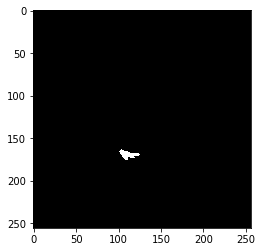

In [7]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

f = Image.open("/home/usuario/Downloads/ISLES2018/pngmask2/339336-frame1.png")
img = np.array(f)
print(img.shape)
plt.imshow(img, cmap="gray")